Name: Jonathan Mazurkiewicz <BR>
Z#: Z23641903 <br>
Link: https://colab.research.google.com/drive/1wTlQYZVRMnotblPfS67Ur3SHqBjECt6S?usp=sharing<br>
Assignment 4 <br>


Much time was taken to ensure that all images showed properly in the PDF. If you see large chunks of blank spaces, it was for this purpose. I could not find another way to achieve this effect.




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


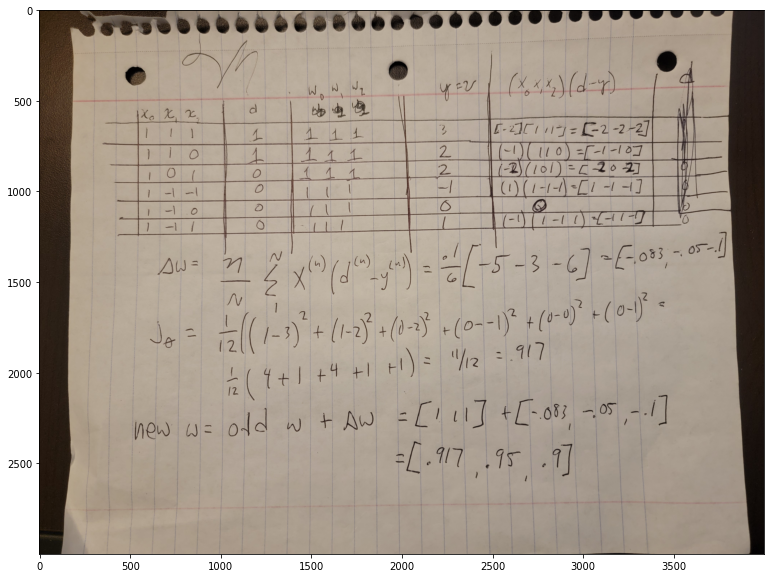

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
img1 = mpimg.imread('/content/drive/MyDrive/cap3(1).jpg')
img2 = mpimg.imread('/content/drive/MyDrive/cap3(2).jpg')
img3 = mpimg.imread('/content/drive/MyDrive/cap3(3).jpg')
img4 = mpimg.imread('/content/drive/MyDrive/cap3(4).jpg')
img5 = mpimg.imread('/content/drive/MyDrive/cap3(5).jpg')

plt.figure(figsize = (15, 10))
plt.imshow(img1)



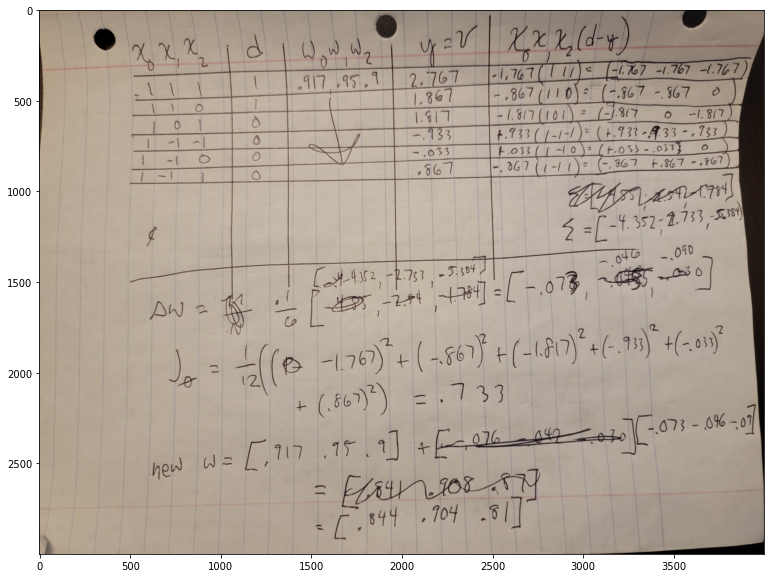

In [ ]:

plt.figure(figsize = (15, 10))
plt.imshow(img2)










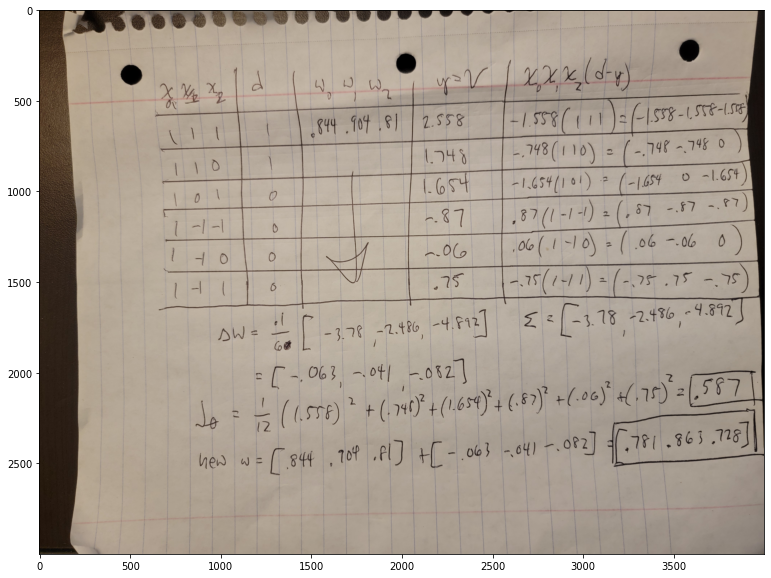

In [ ]:
plt.figure(figsize = (15, 10))
plt.imshow(img3)







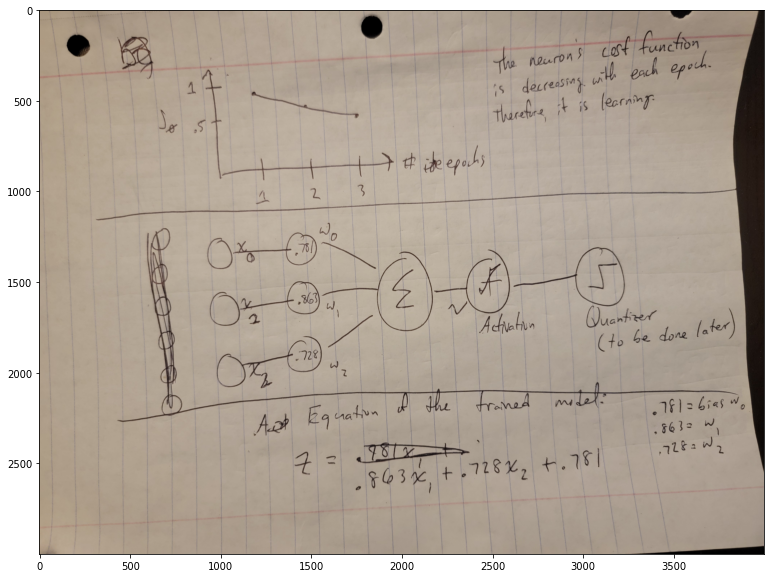

In [ ]:
plt.figure(figsize = (15, 10))
plt.imshow(img4)

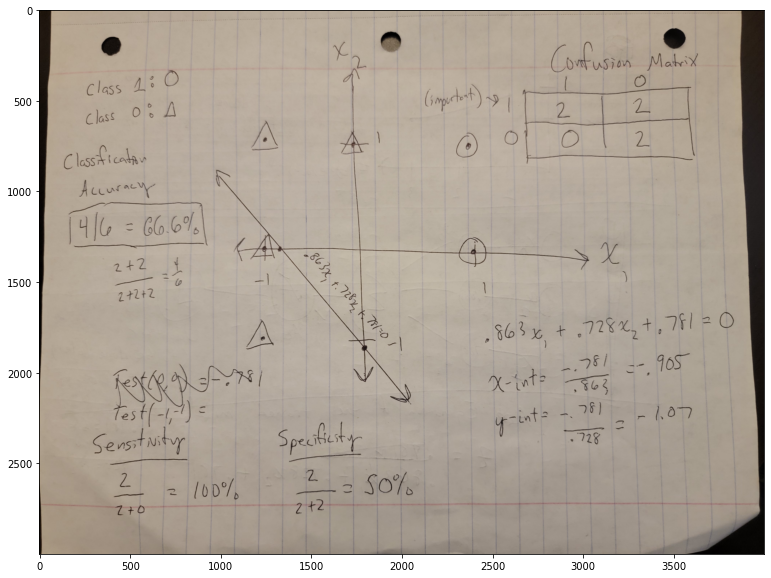

In [ ]:
plt.figure(figsize = (15, 10))
plt.imshow(img5)

In [ ]:










class NeuralNetwork(object):


#Declaration of Neural Network class with randomized weights with a seed value.

  def __init__(self):
    #use a seed value to make sure that the same weights are generated in each run
    np.random.seed(1)
    self.weight_matrix = 2 * np.random.random((3, 1)) - 1
    #this code assigns random numbers between -1 and 1 to a matrix to use as weights for the model
    self.learningRate = 1

  def forward_propagation(self, inputs):
    outs = np.dot(inputs, self.weight_matrix)
    #Create np array of the dot product of the inputs and the weights
    return self.sigmoid(outs)
    #Return the np array of the dot product above after going through the activation function

  def pred(self, inputs):
    prob = self.forward_propagation(inputs)
    preds = np.int8(prob >= .5)
    # Pass inputs to forward_propagation function, which returns np array of the probabilistic class prediction
    return preds
    # Return np array of predicted classes

  def sigmoid(self, x):
    return 1/(1+np.exp(-x))

  def plot_cost_fun(self, J, iterations):
    #plotting the learning curve
    x = np.arange(iterations, dtype = int)
    y = J
    plt.plot(x,y)
    plt.axis([-1,x.shape[0]+1,-1, np.max(y) +1])
    plt.title('Learning Curve')
    plt.xlabel('x: iteration #')
    plt.ylabel('y: J(θ)')
    plt.show()

  def train_GDL(self, train_inputs, train_outputs, num_train_iterations=10, learningRate=1):
    N=train_inputs.shape[0]
    self.l_rate=learningRate
    cost_func = np.array([])
    for i in range(num_train_iterations):
      outputs = self.forward_propagation(train_inputs)
      error = train_outputs - outputs
      adjustment = (self.l_rate/N)*np.sum(np.multiply(error, train_inputs),axis=0)

      cost_func = np.append(cost_func,(1/2*N*np.sum(np.power(error, 2))))

      self.weight_matrix[:, 0] += adjustment

    print('Final Iteration Classifier')
    plot_fun_thr(train_inputs[:,1:3], train_outputs[:,0],self.weight_matrix[:,0], classes)
    self.plot_cost_fun(cost_func, num_train_iterations)

def plot_fun_thr(features, labels, thre_parms, classes):
      #plotting the data points
    plt.plot(features[labels[:]==classes[0],0], features[labels[:]==classes[0],1], 'rs',
             features[labels[:]==classes[1],0], features[labels[:]==classes[1],1], 'g^')
    plt.axis([-2,3,-2,4])

      #plotting the seperating line

    x1 = np.linspace(-1,2,50)
    x2 = -(thre_parms[1]*x1 + thre_parms[0])/thre_parms[2]
      #refer to characteristic equation to understand why this is. e.g. c + ax + by = 0; solve for y
    plt.plot(x1, x2, '-r')
    plt.xlabel("x: feature 1")
    plt.ylabel("y: feature 2")
    plt.legend(["Class" + str(classes[0]), "Class" + str(classes[1])])
    plt.show()



In [ ]:
classes = [0,1]
features = np.array([[1,1],
                     [1,0],
                     [0,1],
                     [.5,-1],
                     [.5,3],
                     [.7,2],
                     [-1,0],
                     [-1,1],
                     [2,0],
                     [0,0]])

labels = np.array([1,1,0,0,1,1,0,0,1,0])
#The assignments calls for a 10x1 array, but the code given here is meant to work for a 1x10 array
bias = np.ones((features.shape[0], 1))
features = np.append(bias, features, axis=1)



The untrained weights are: 
 
 [[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]


Trial #1: Learning Rate of 1.0
Final Iteration Classifier


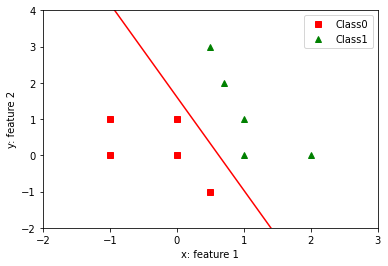

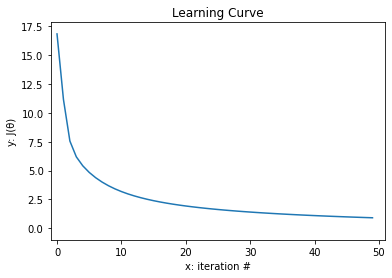

The weights after training are: 
 [[-2.16960572]
 [ 3.46870407]
 [ 1.34808305]]


In [ ]:
neural_network1 = NeuralNetwork()
neural_network2 = NeuralNetwork()
neural_network3 = NeuralNetwork()
neural_network4 = NeuralNetwork()
#Create the neural network
print("The untrained weights are: \n \n", neural_network1.weight_matrix)
#Check the untrained weights
num_iterations = 50

print("\n\nTrial #1: Learning Rate of 1.0")
neural_network1.train_GDL(features, np.expand_dims(labels, axis=1), num_iterations, 1)
print("The weights after training are: \n", neural_network1.weight_matrix)


 
 Trial #2: Learning Rate of 0.5
The untrained weights are: 
 
 [[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]
Final Iteration Classifier


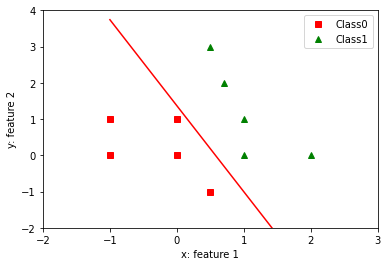

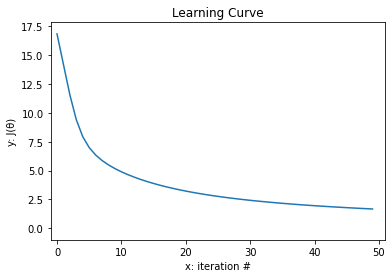

The weights after training are: 
 [[-1.47953369]
 [ 2.56651734]
 [ 1.08127652]]


In [ ]:
print("\n \n Trial #2: Learning Rate of 0.5")
print("The untrained weights are: \n \n", neural_network2.weight_matrix)
neural_network2.train_GDL(features, np.expand_dims(labels, axis=1), num_iterations, .5)
print("The weights after training are: \n", neural_network2.weight_matrix)


 
 Trial #1: Learning Rate of 0.1
Final Iteration Classifier


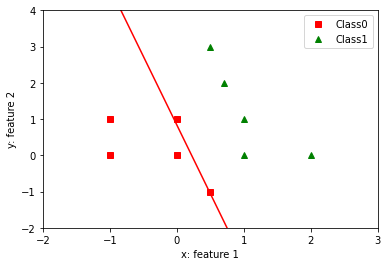

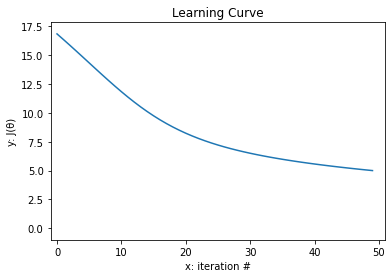

The weights after training are: 
 [[-0.28643485]
 [ 1.29840869]
 [ 0.34286026]]


In [ ]:





print("\n \n Trial #1: Learning Rate of 0.1")
neural_network3.train_GDL(features, np.expand_dims(labels, axis=1), num_iterations, .1)
print("The weights after training are: \n", neural_network3.weight_matrix)

























 
 Trial #1: Learning Rate of 0.01
Final Iteration Classifier


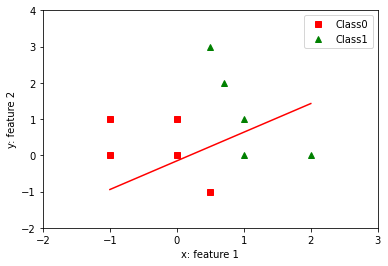

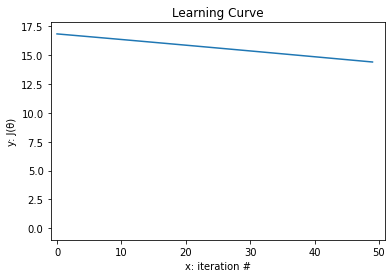

The weights after training are: 
 [[-0.1122277 ]
 [ 0.58096448]
 [-0.73483257]]

 



In [ ]:








print("\n \n Trial #1: Learning Rate of 0.01")
neural_network4.train_GDL(features, np.expand_dims(labels, axis=1), num_iterations, .01)
print("The weights after training are: \n", neural_network4.weight_matrix)
print("\n \n")




































PART F:

From the learning curves with the different learning weights, I can see that the model learns slower. This is evidenced by the cost function starting at the same value (since the initial weights were the same for each sample), but reducing much more slowly dependent upon the learning rate of the model. In this situation, a learning rate of 1.0 was most effective. It provides the quickest minimization of the cost function without misclassifying data points. Therefore, less resources will be needed.